In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

dataDict = np.load('/home/alessio/n-Propagation/datanewoneWithNACnow.npy')[()]
print('npy loaded')
name_data_file = '/home/alessio/n-Propagation/newExtrapolated_gammaExtrExag.pickle'
data = qp.pickleLoad(name_data_file)
print('Pickle loaded')
dataDict.keys(), data.keys()

npy loaded
Pickle loaded


(dict_keys(['kinCube', 'geoCUBE', 'potCube', 'nacCUBE', 'dipCUBE', 'phis', 'gams', 'thes']),
 dict_keys(['kinCube', 'geoCUBE', 'potCube', 'dipCUBE', 'smoCube', 'phis', 'gams', 'thes']))

In [2]:
nac_car = dataDict['nacCUBE'][:,:,:,:,:,7:,:]
nac_int = data['smoCube'][15:-15,15:-15,30:-30,:,:,:]
print('{} {}'.format(nac_car.shape, nac_int.shape))



(25, 26, 100, 8, 8, 8, 3) (25, 26, 100, 8, 8, 3)


In [81]:

#np.amax(nac_car),np.amax(nac_int)
maxi = np.amax(nac_car)

p,g,t,s1,s2,a,c = np.unravel_index(nac_car.argmax(), nac_car.shape)
print(p,g,t,s1,s2)
print(np.linalg.norm(nac_int[p,g,t,s1,s2]))
print(np.linalg.norm(nac_car[p,g,t,s1,s2]))
60224.3241919/0.0834085454574

13 3 79 4 5
0.0834085454574
60224.3241919


722040.2161629699

In [92]:
umass = 1836

C_mass = 12 * umass
H_mass = 1  * umass

massVector = np.array([C_mass,C_mass,C_mass,C_mass,C_mass,C_mass,C_mass,C_mass,C_mass,C_mass,C_mass,C_mass,H_mass,H_mass,H_mass,H_mass,H_mass,H_mass,H_mass,H_mass,H_mass,H_mass,H_mass,H_mass])
massVector.reshape(8,3)

array([[22032, 22032, 22032],
       [22032, 22032, 22032],
       [22032, 22032, 22032],
       [22032, 22032, 22032],
       [ 1836,  1836,  1836],
       [ 1836,  1836,  1836],
       [ 1836,  1836,  1836],
       [ 1836,  1836,  1836]])

<IPython.core.display.Javascript object>


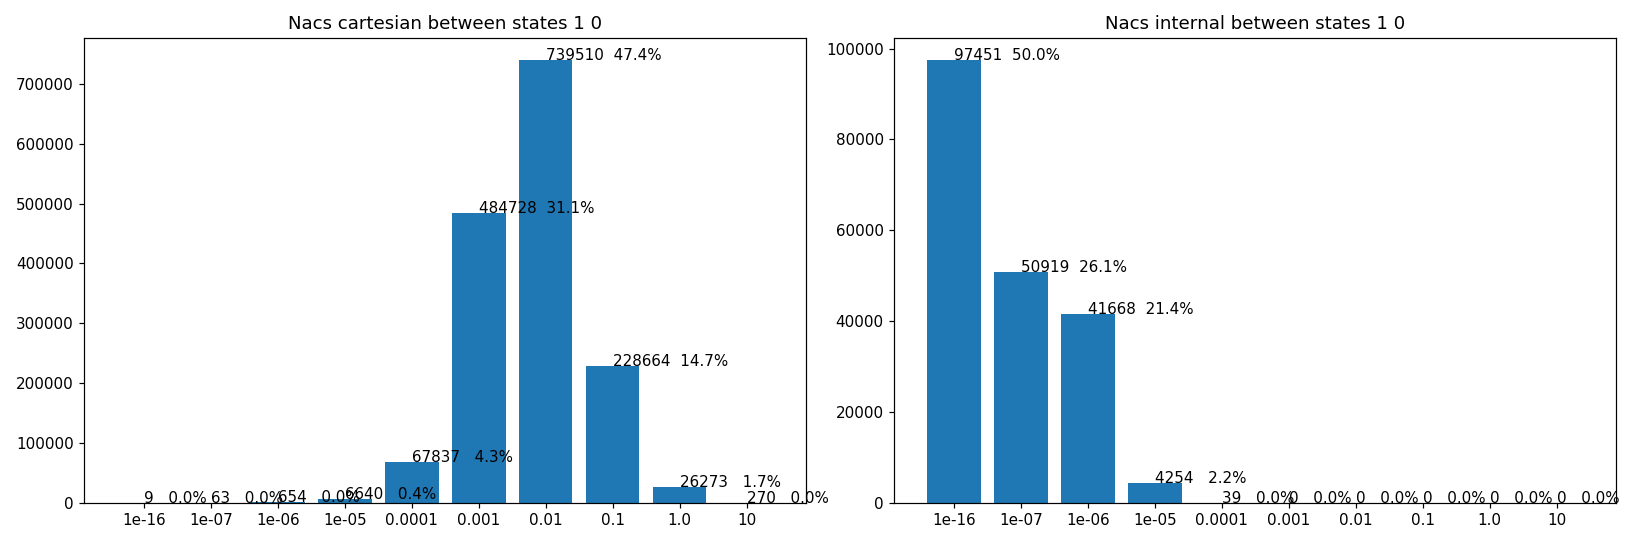

<IPython.core.display.Javascript object>


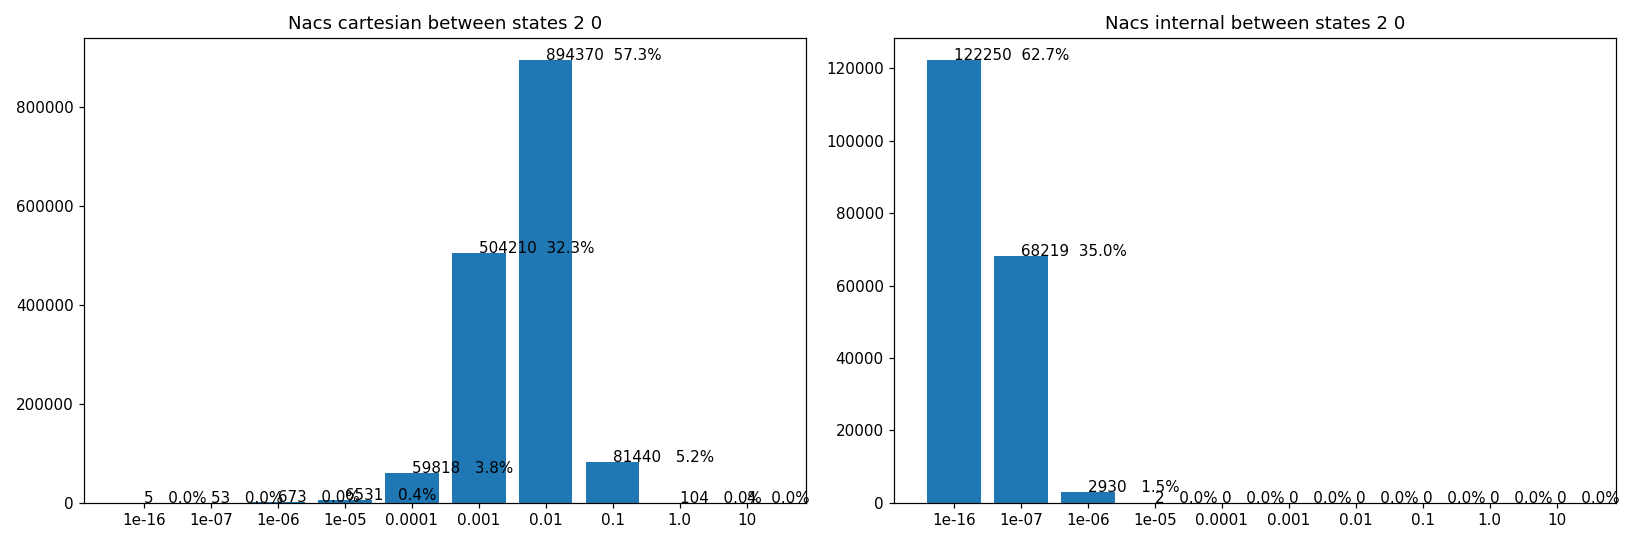

<IPython.core.display.Javascript object>


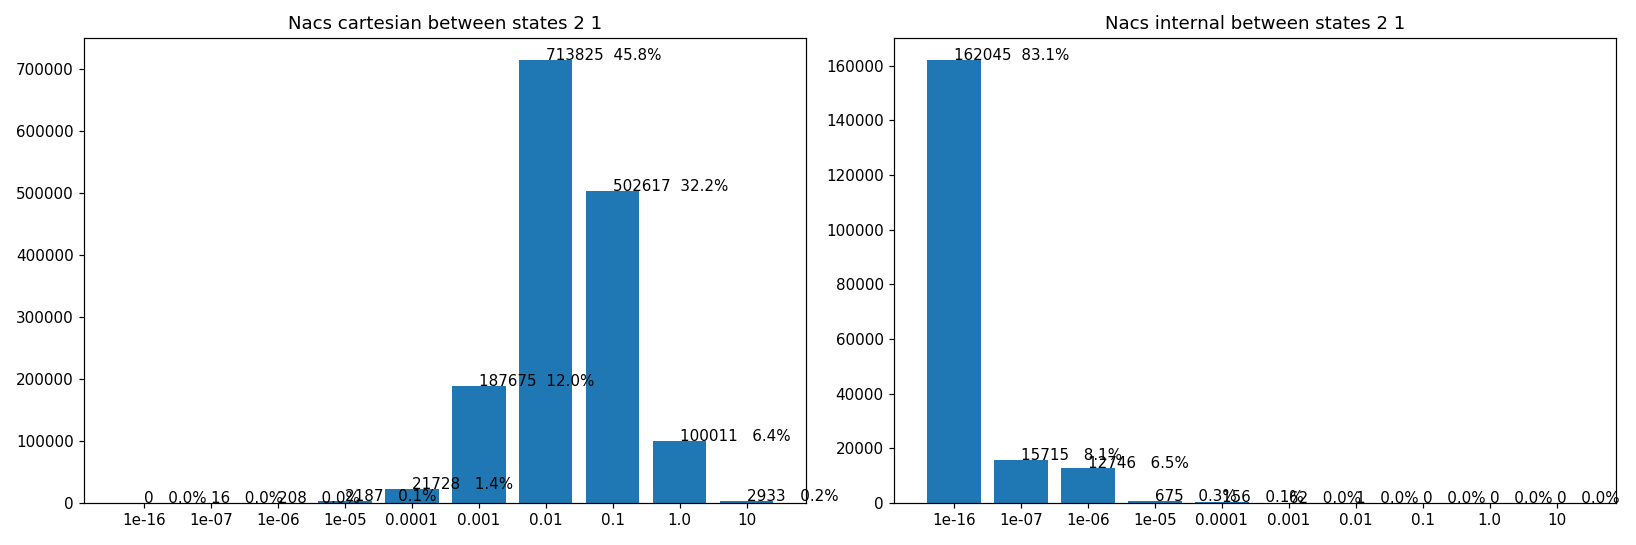

<IPython.core.display.Javascript object>


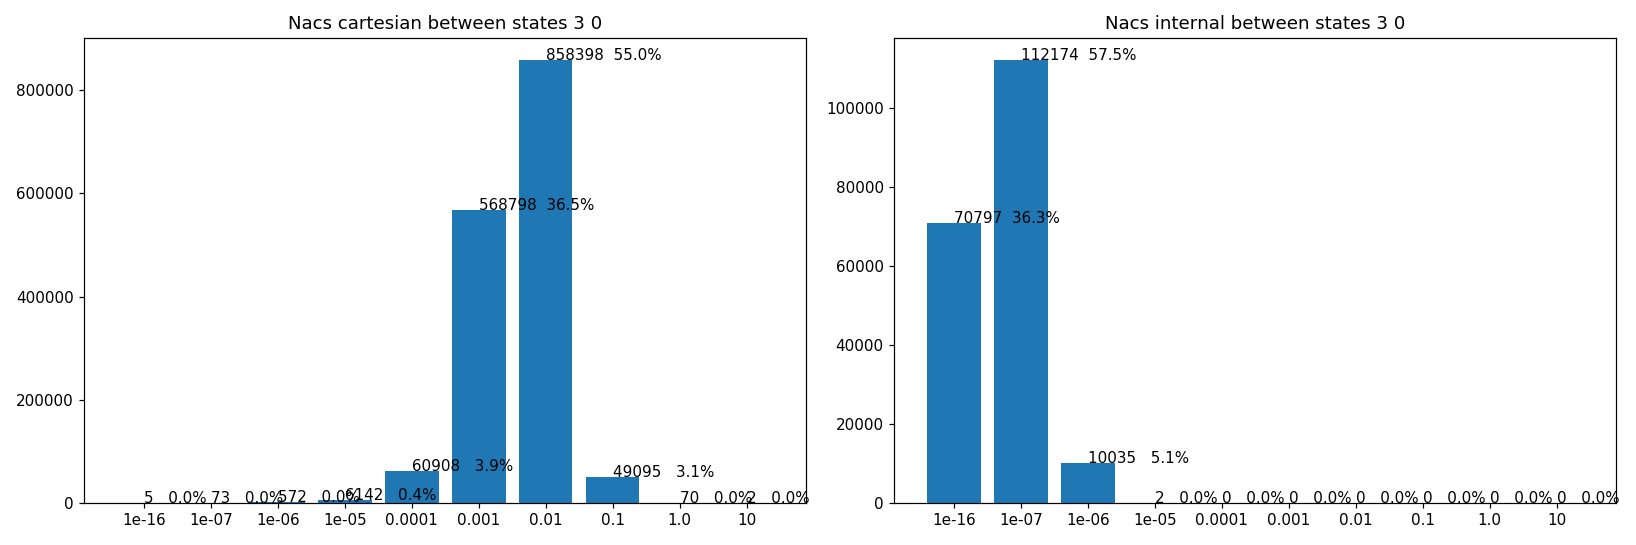

<IPython.core.display.Javascript object>


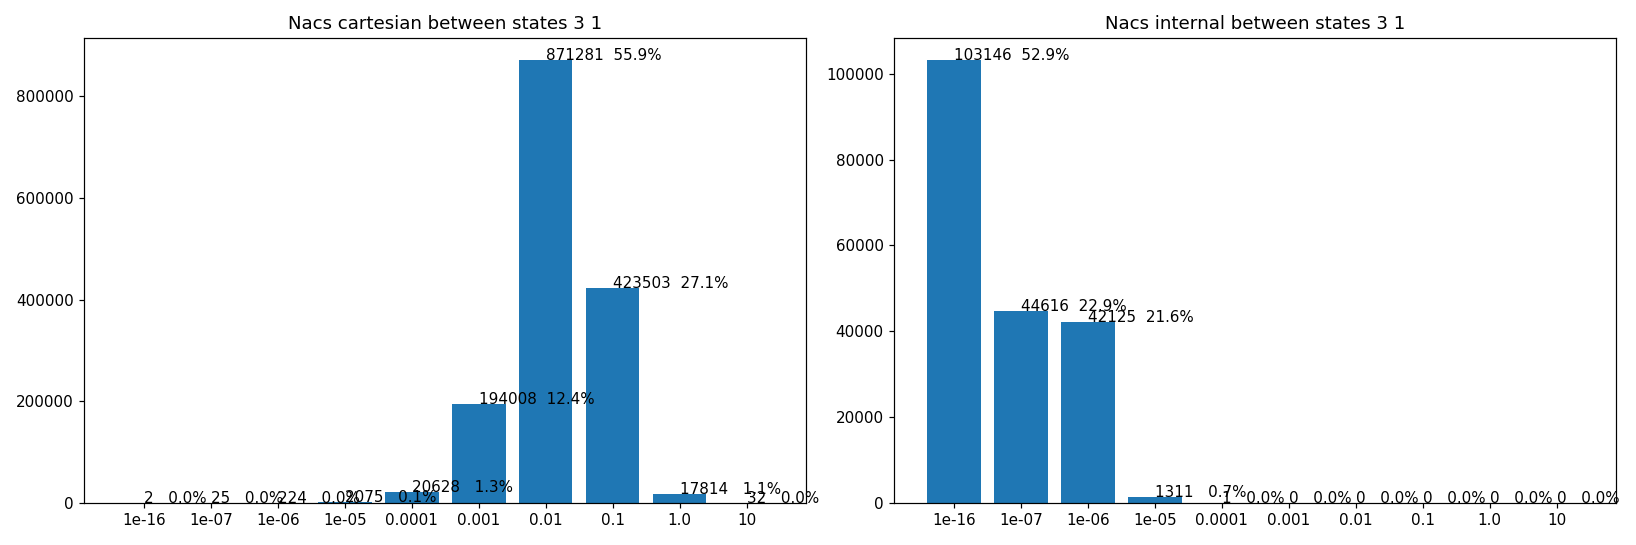

<IPython.core.display.Javascript object>


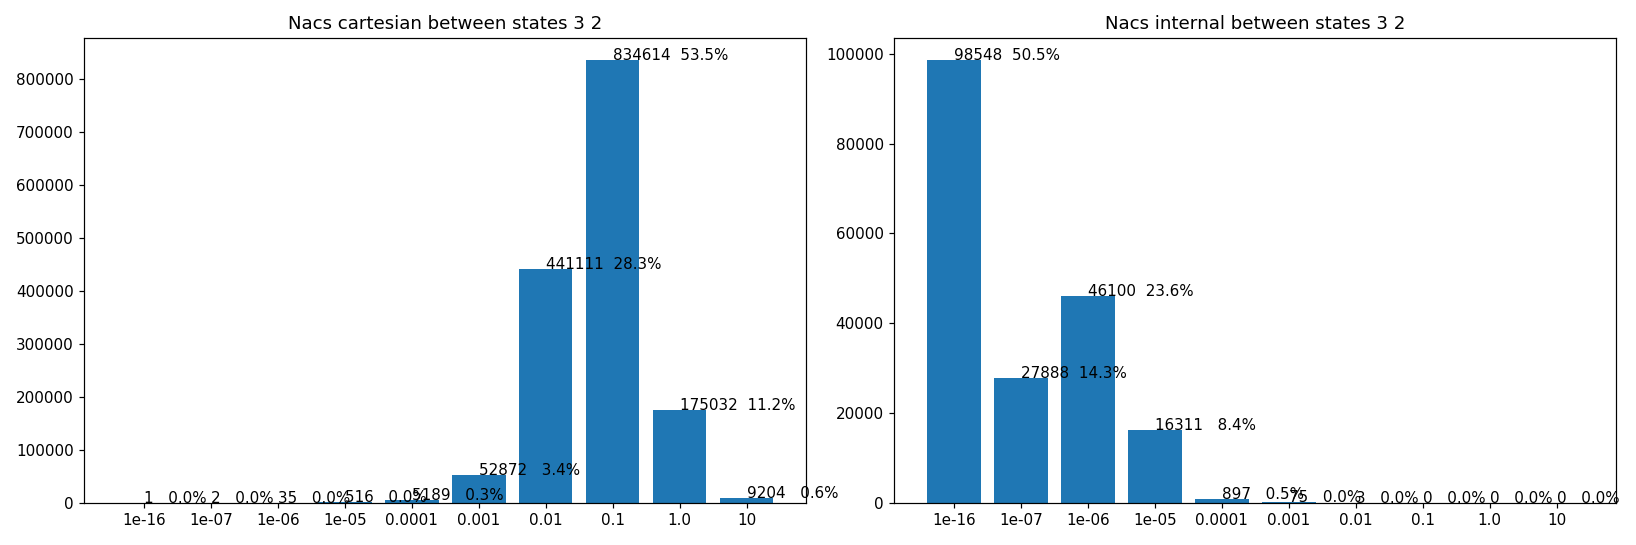

<IPython.core.display.Javascript object>


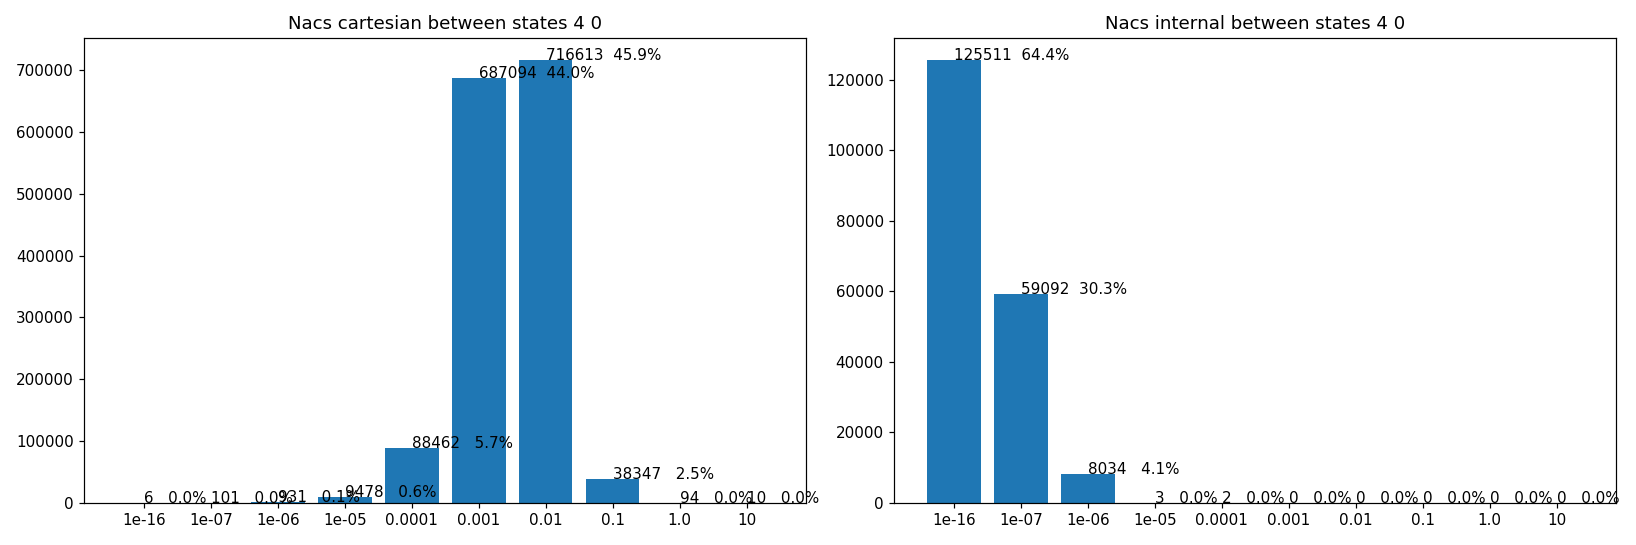

<IPython.core.display.Javascript object>


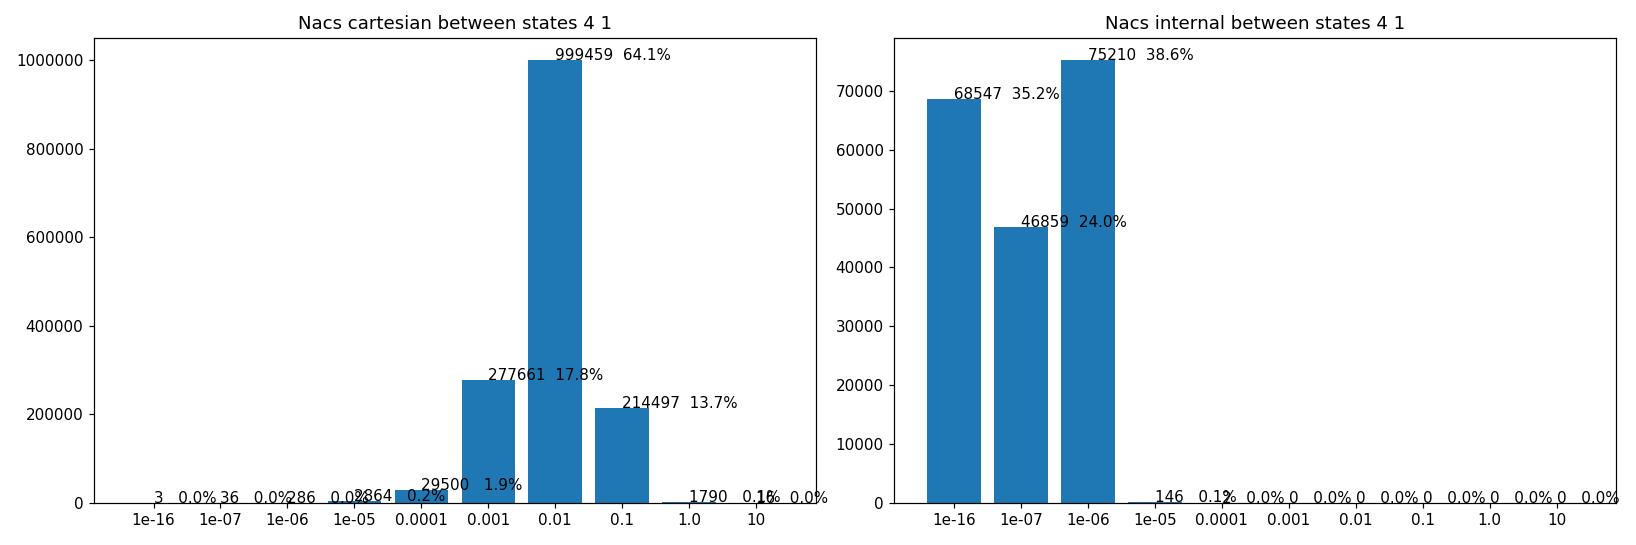

<IPython.core.display.Javascript object>


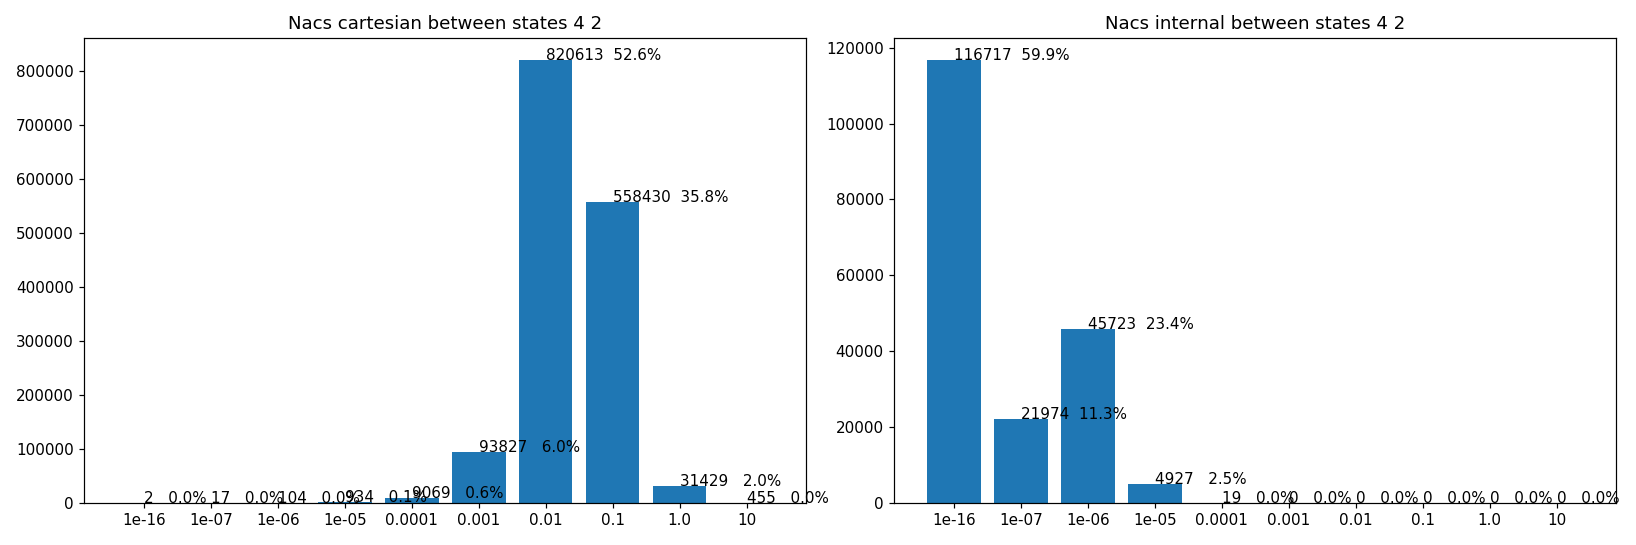

<IPython.core.display.Javascript object>


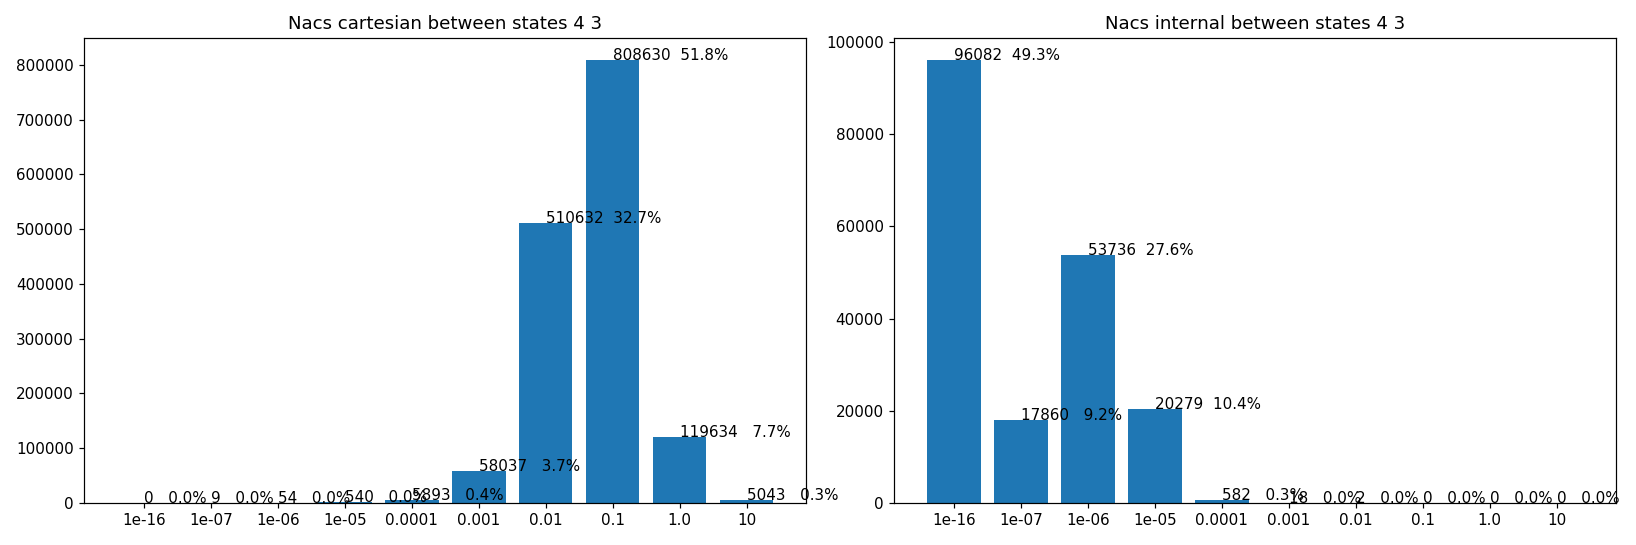

<IPython.core.display.Javascript object>


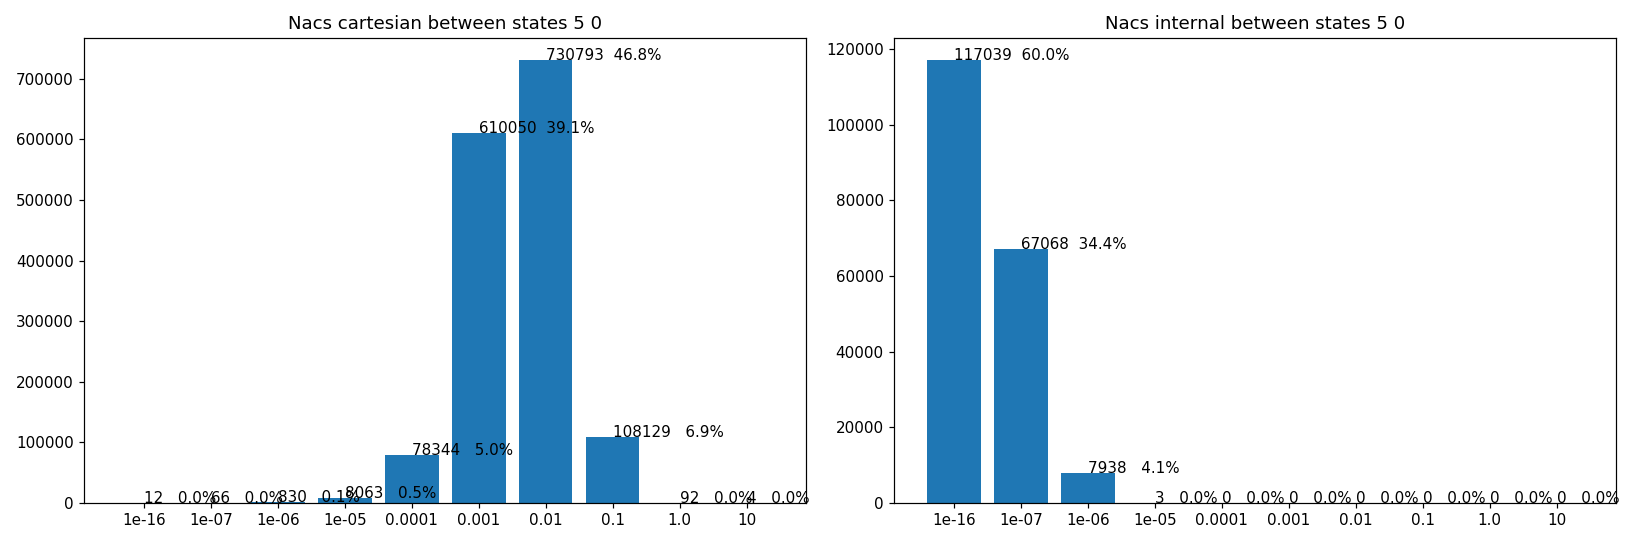

<IPython.core.display.Javascript object>


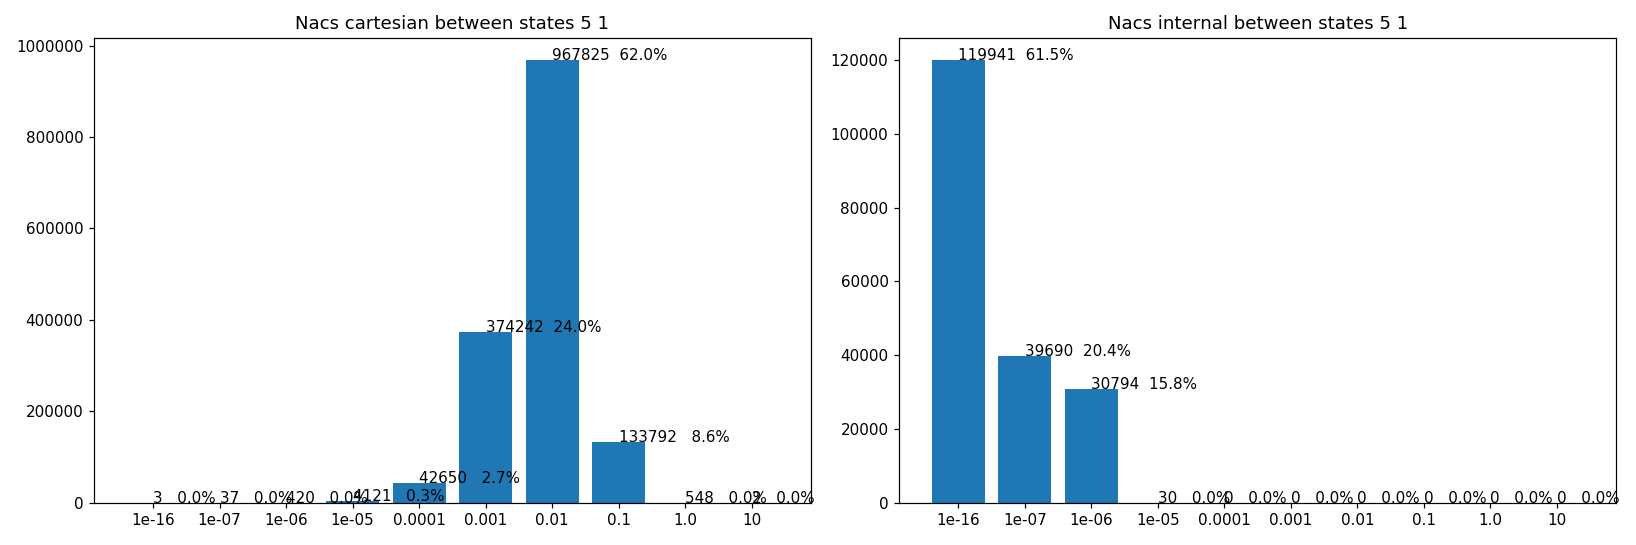

<IPython.core.display.Javascript object>


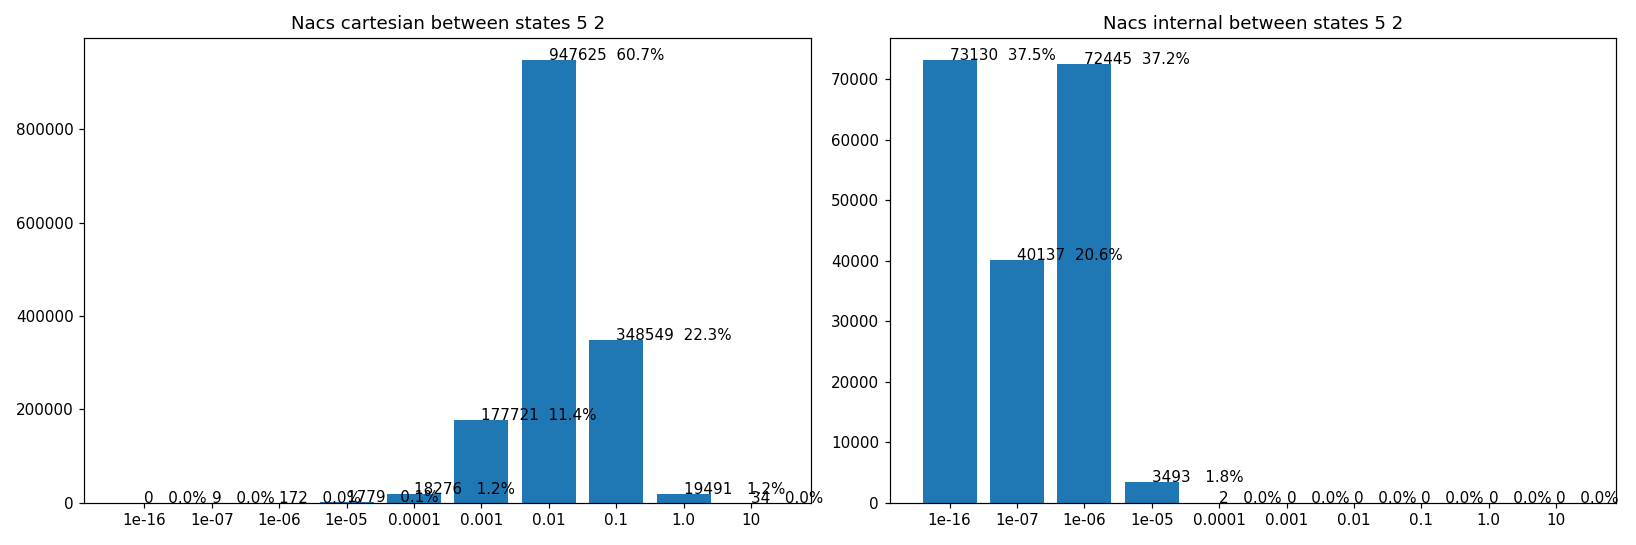

<IPython.core.display.Javascript object>


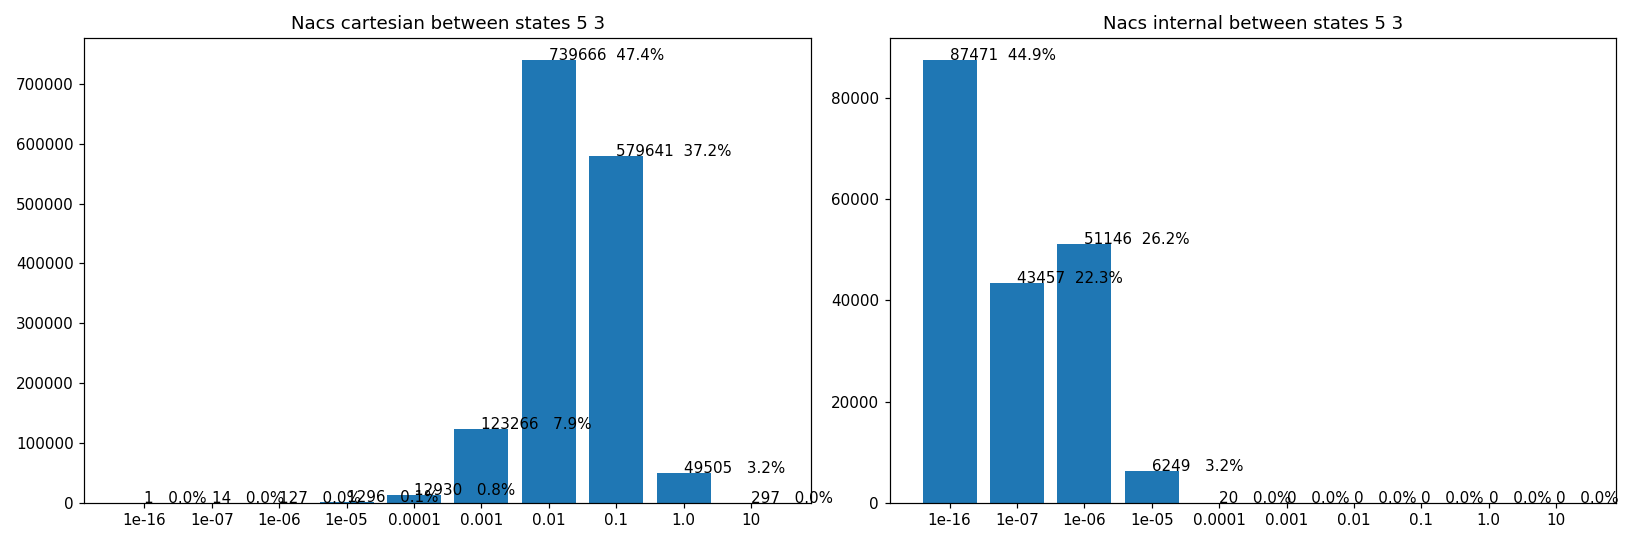

<IPython.core.display.Javascript object>


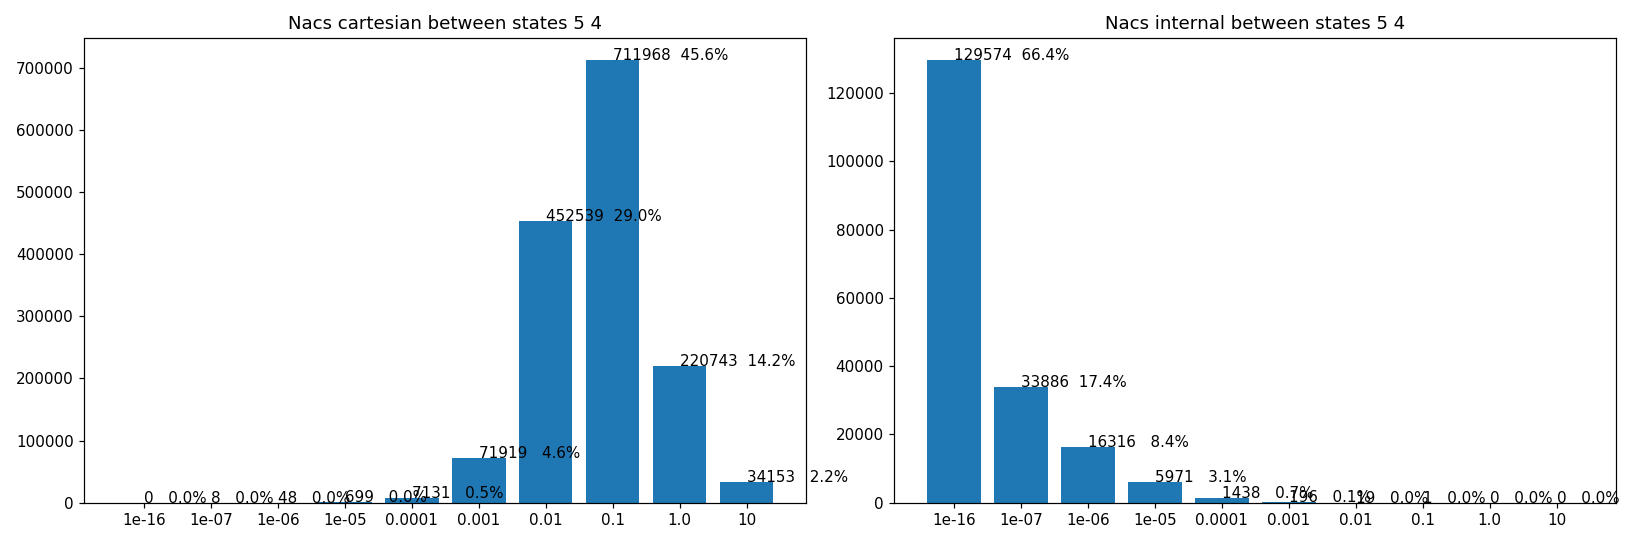

<IPython.core.display.Javascript object>


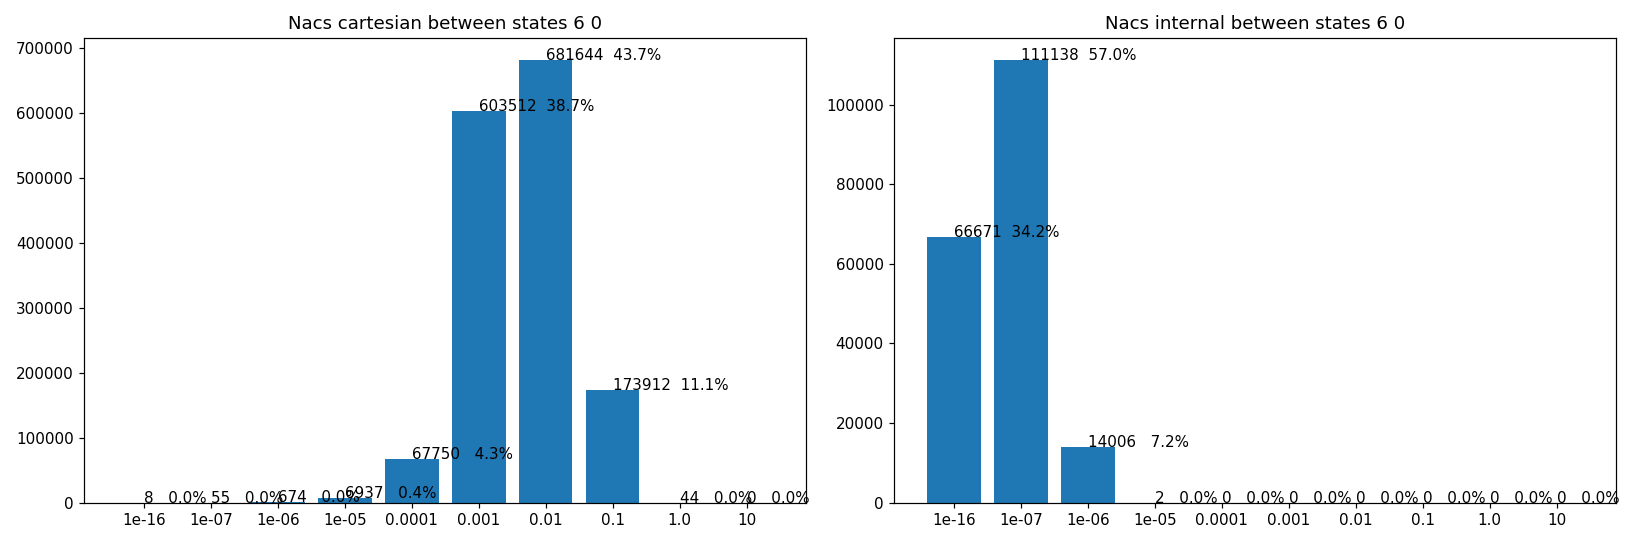

<IPython.core.display.Javascript object>


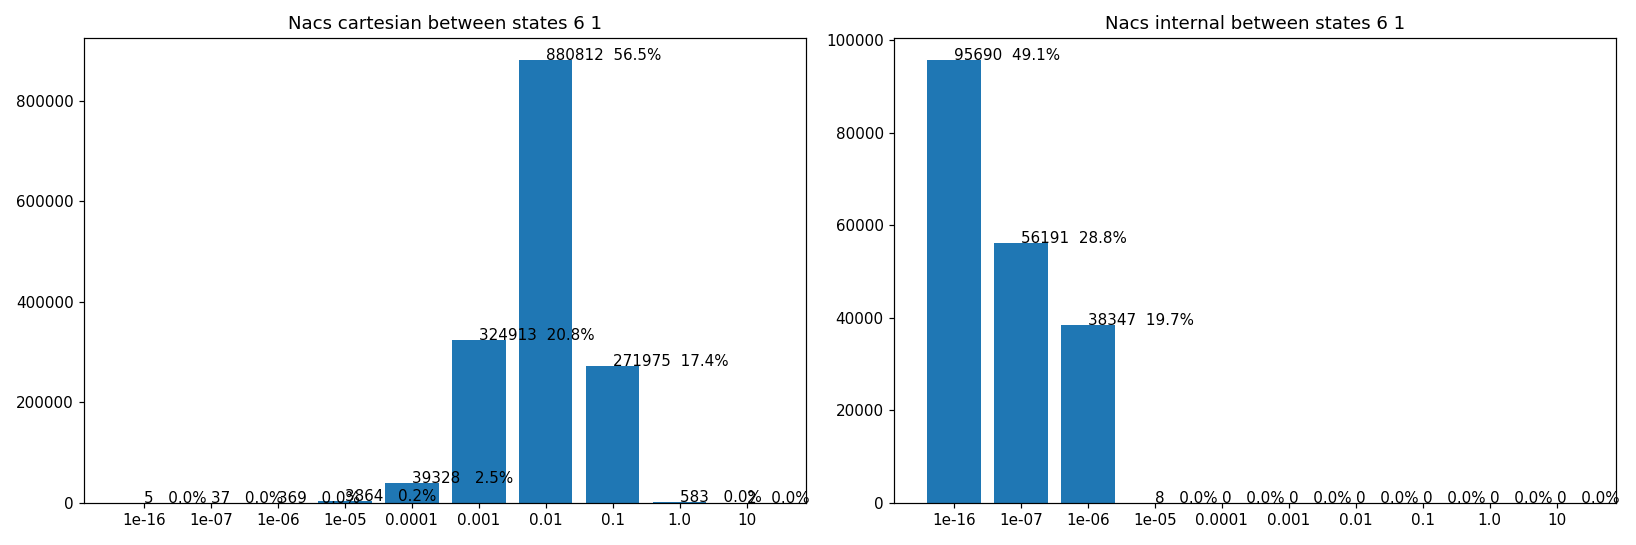

<IPython.core.display.Javascript object>


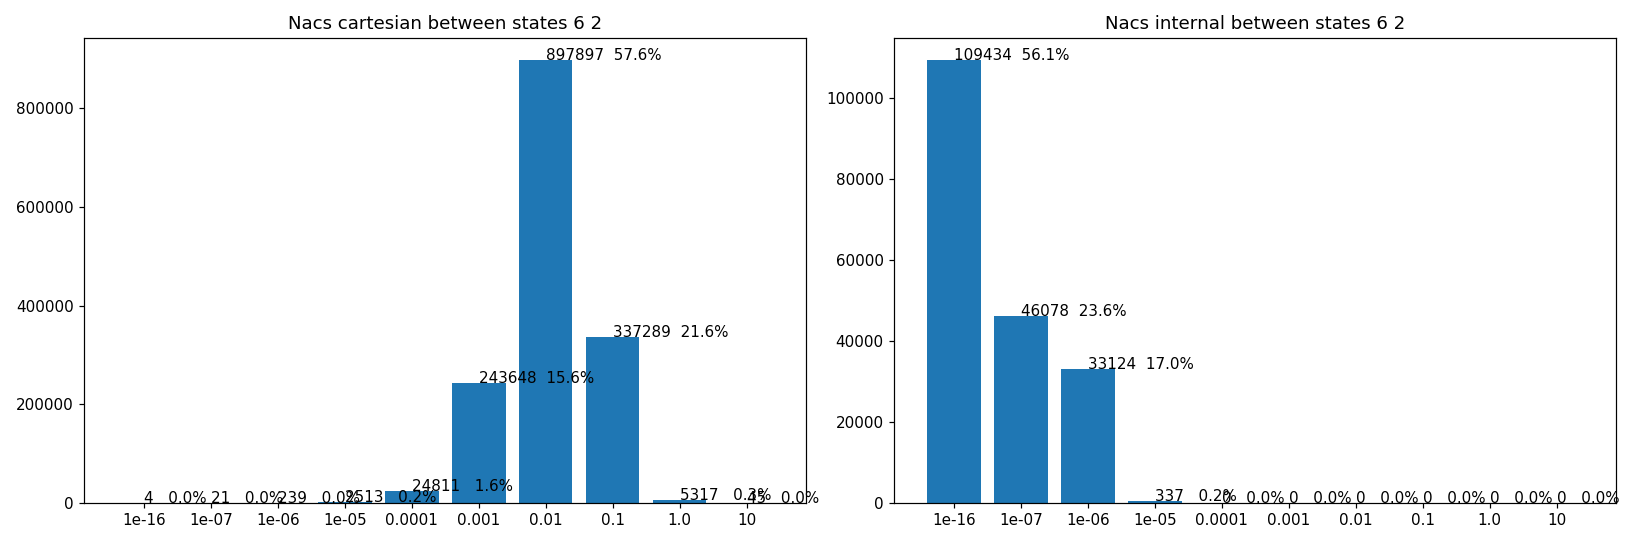

<IPython.core.display.Javascript object>


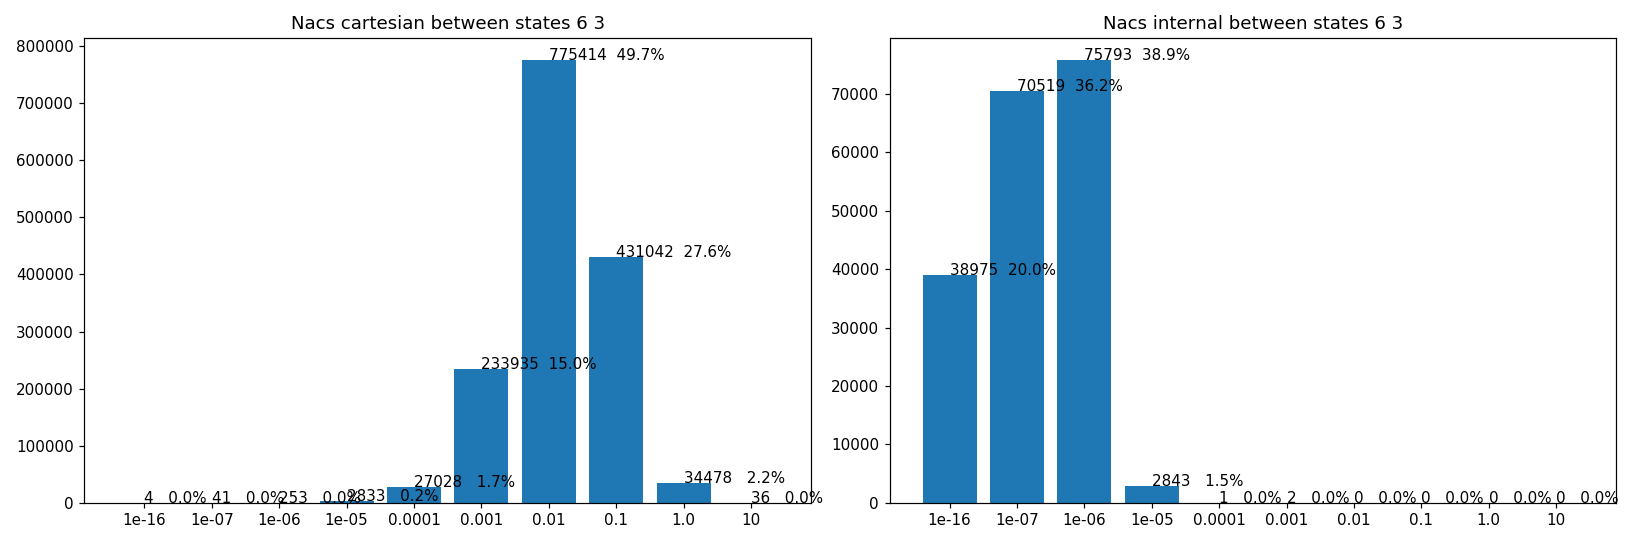

<IPython.core.display.Javascript object>


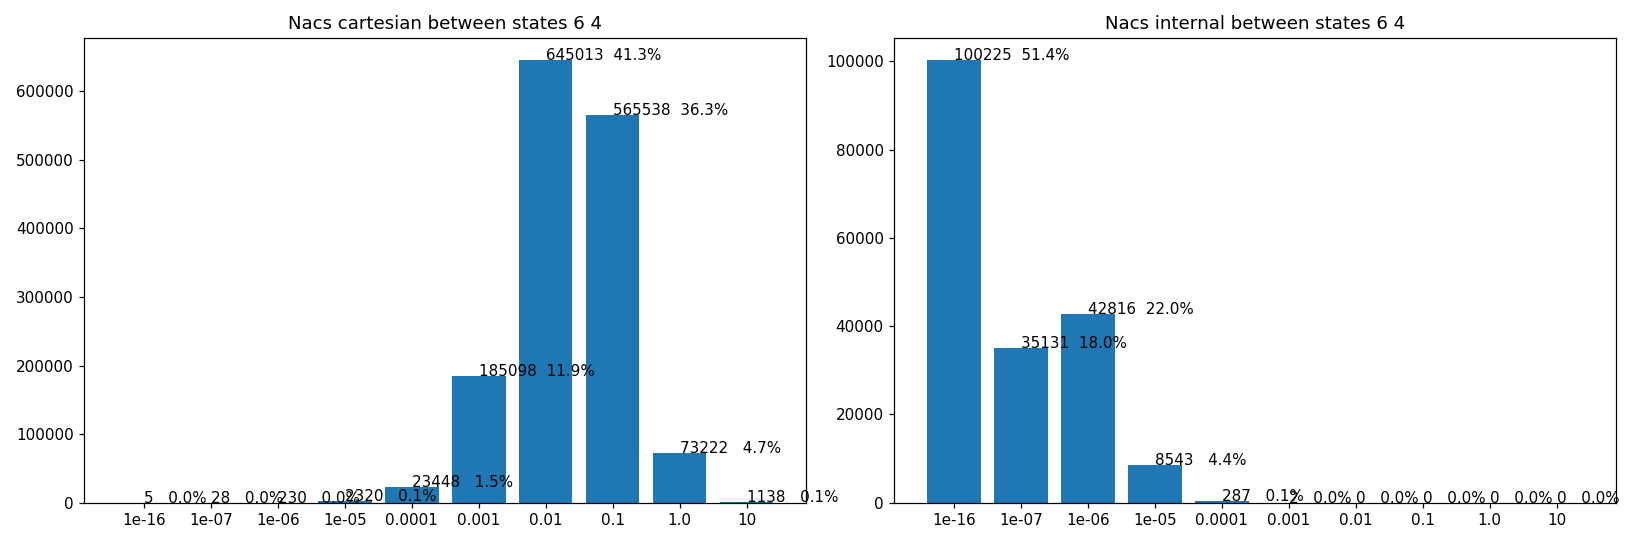

/home/alessio/config/miniconda/envs/quantumpropagator/lib/python3.5/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


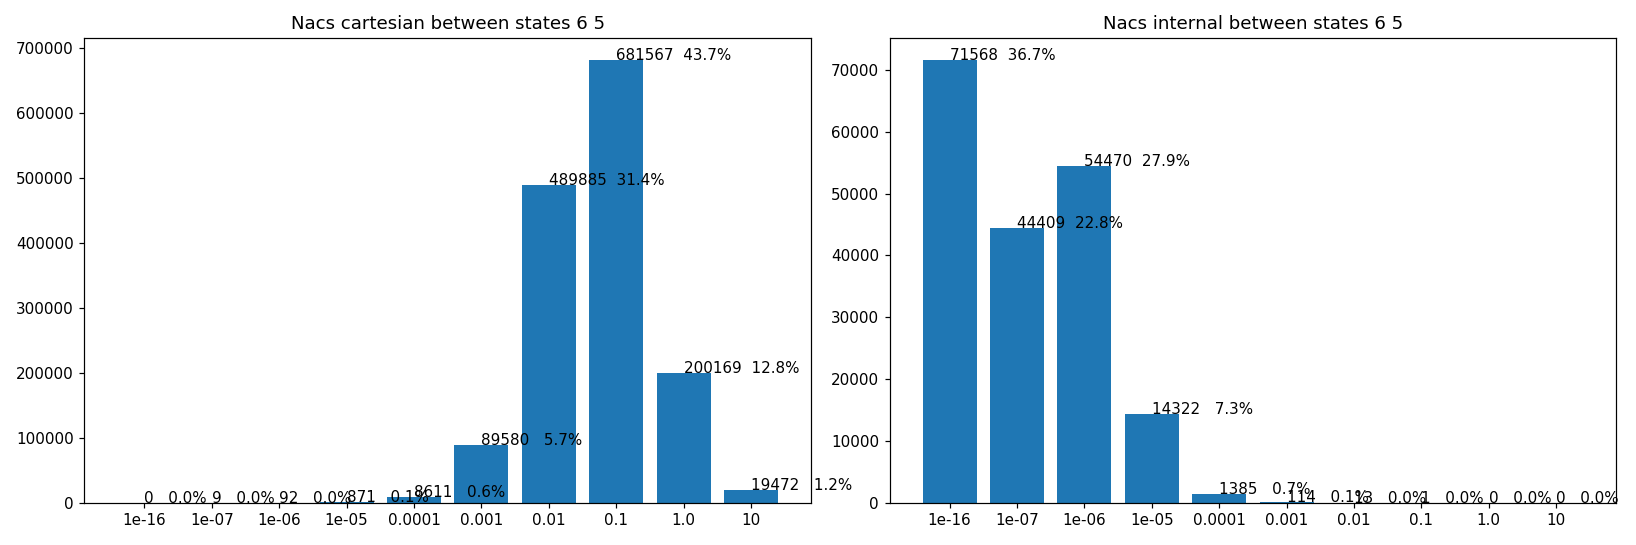

<IPython.core.display.Javascript object>


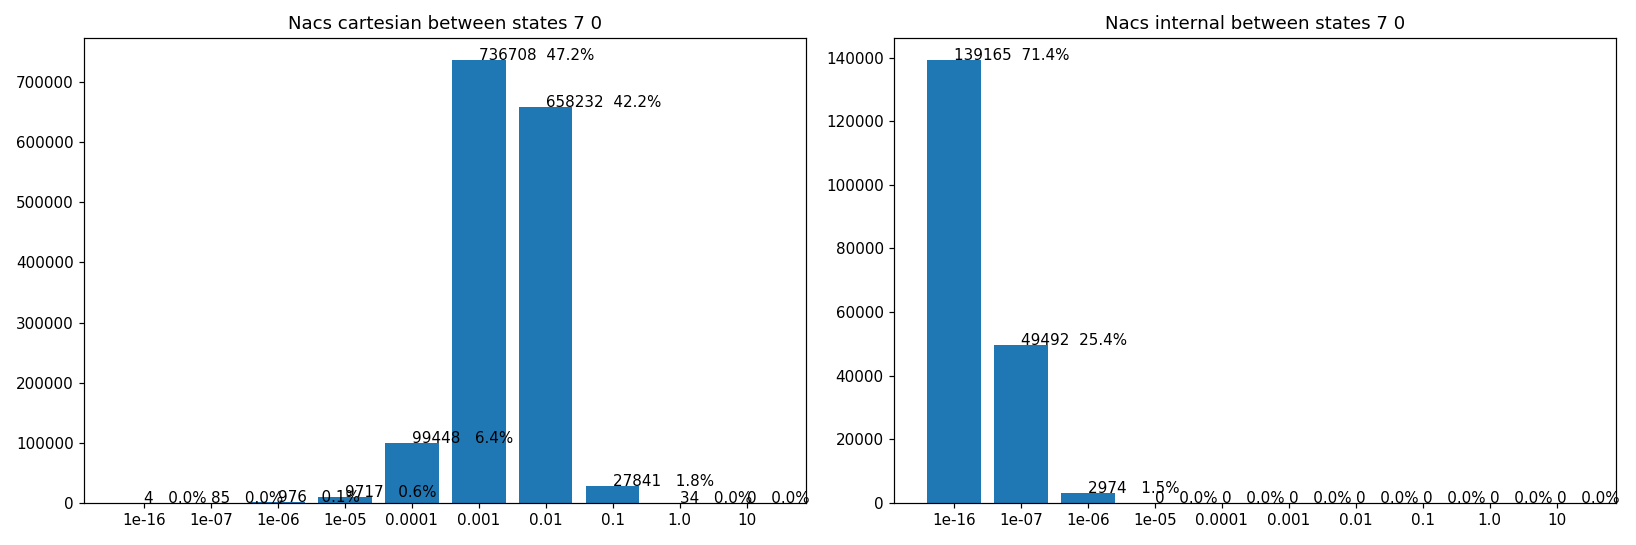

<IPython.core.display.Javascript object>


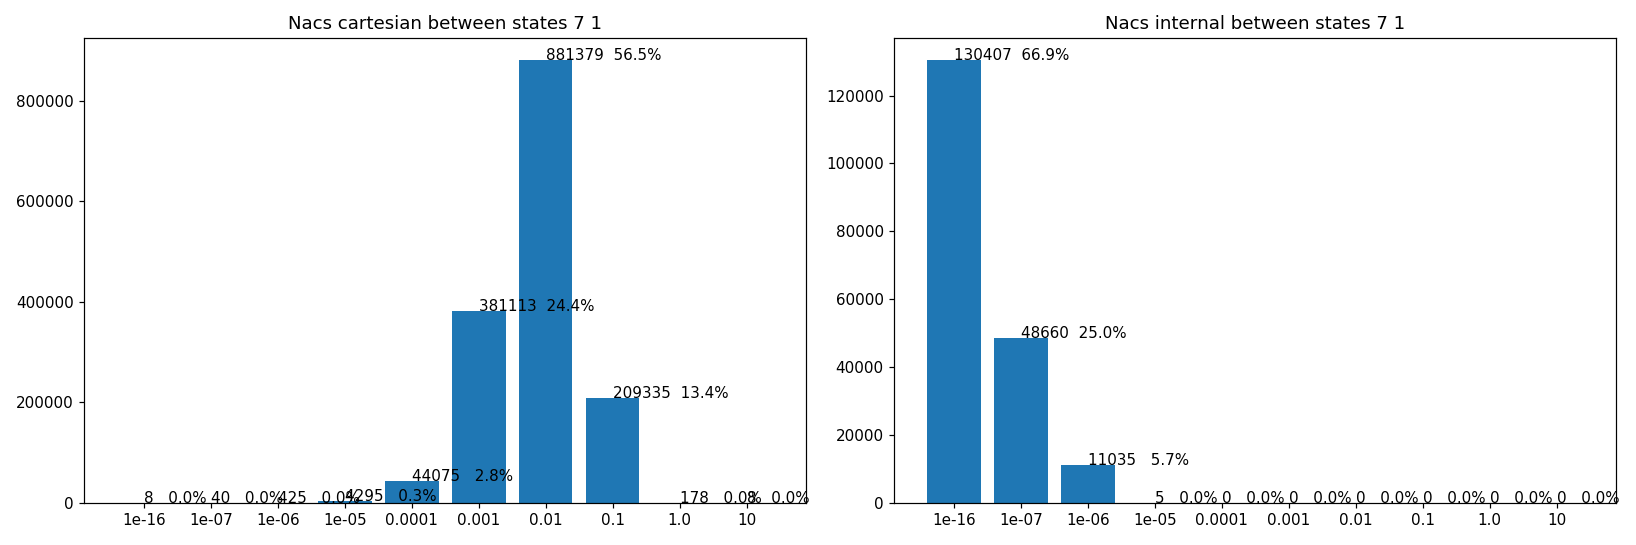

<IPython.core.display.Javascript object>


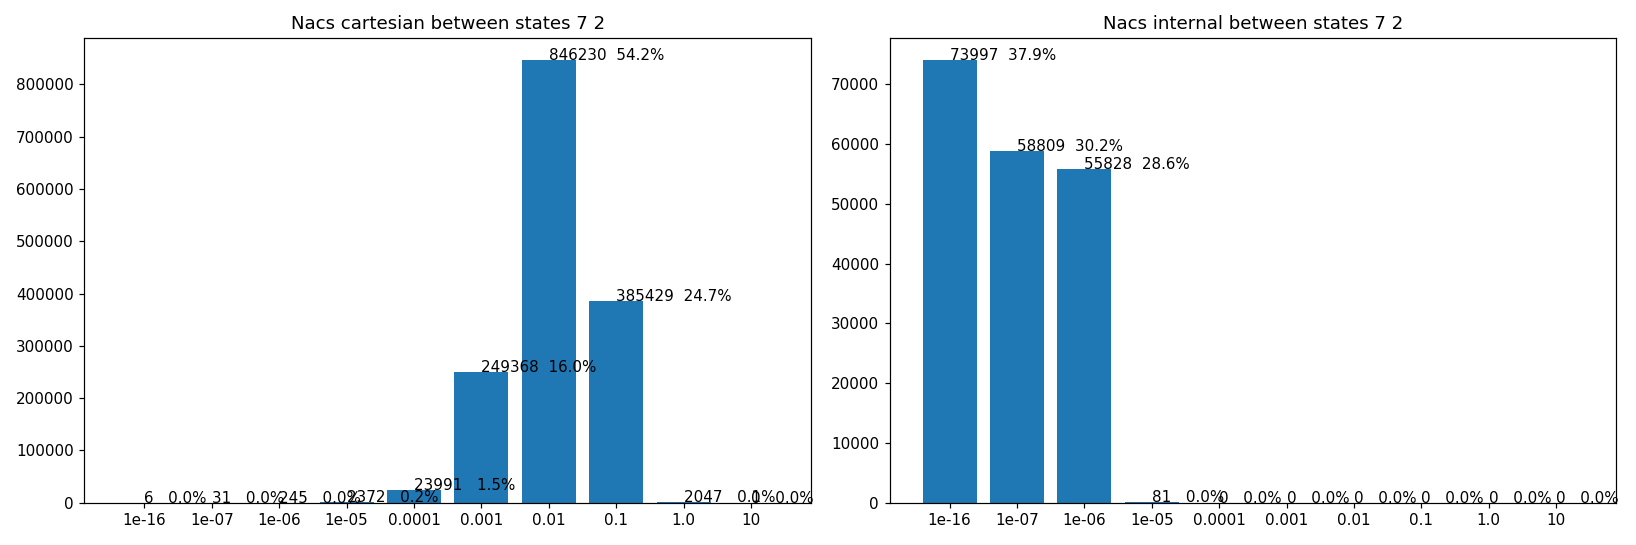

<IPython.core.display.Javascript object>


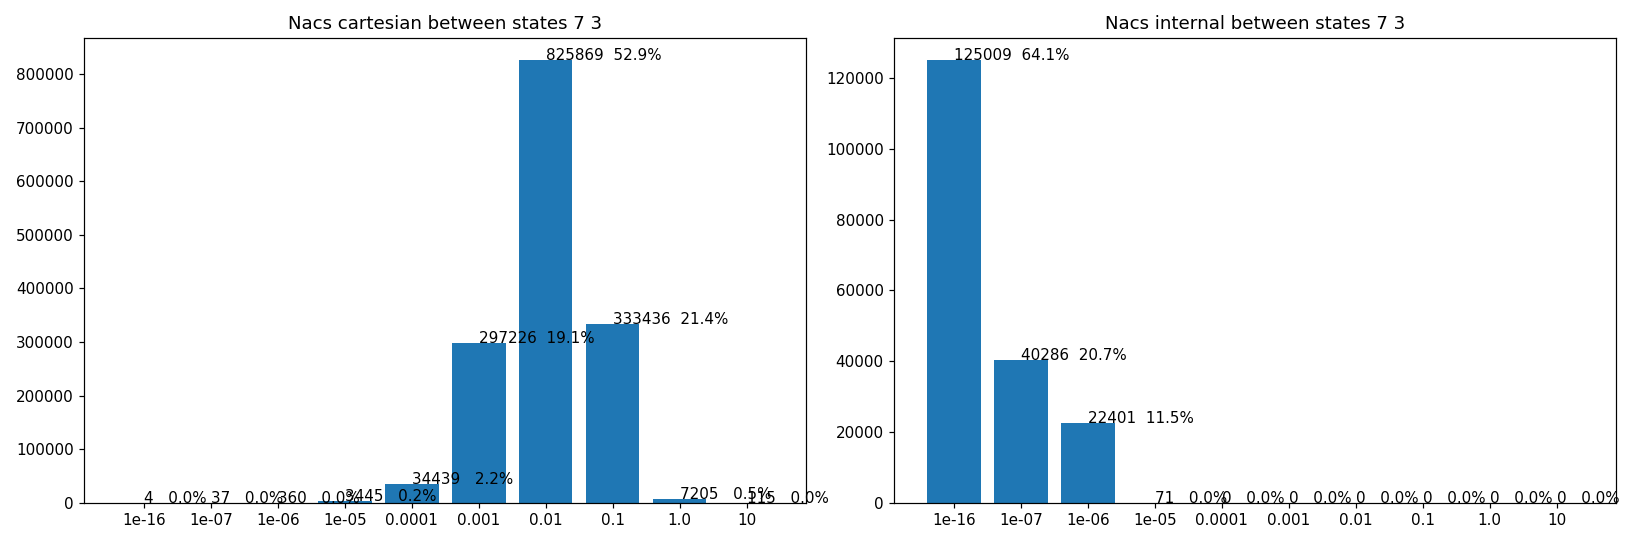

<IPython.core.display.Javascript object>


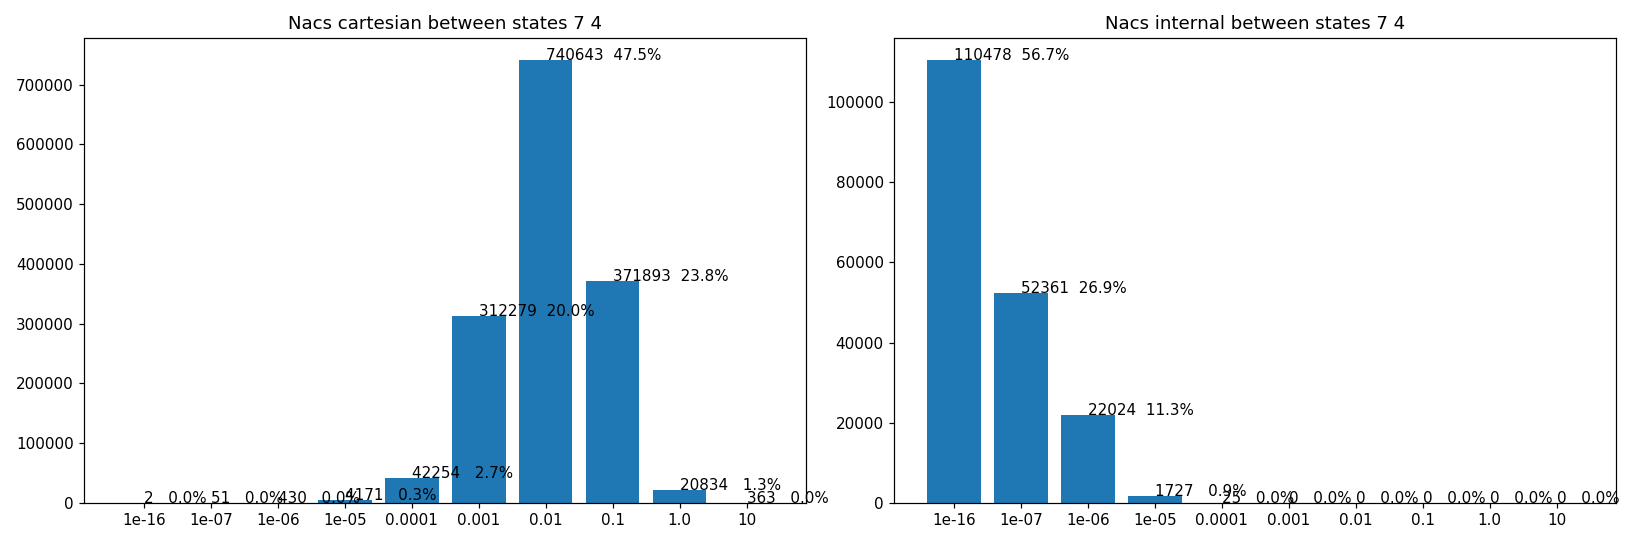

<IPython.core.display.Javascript object>


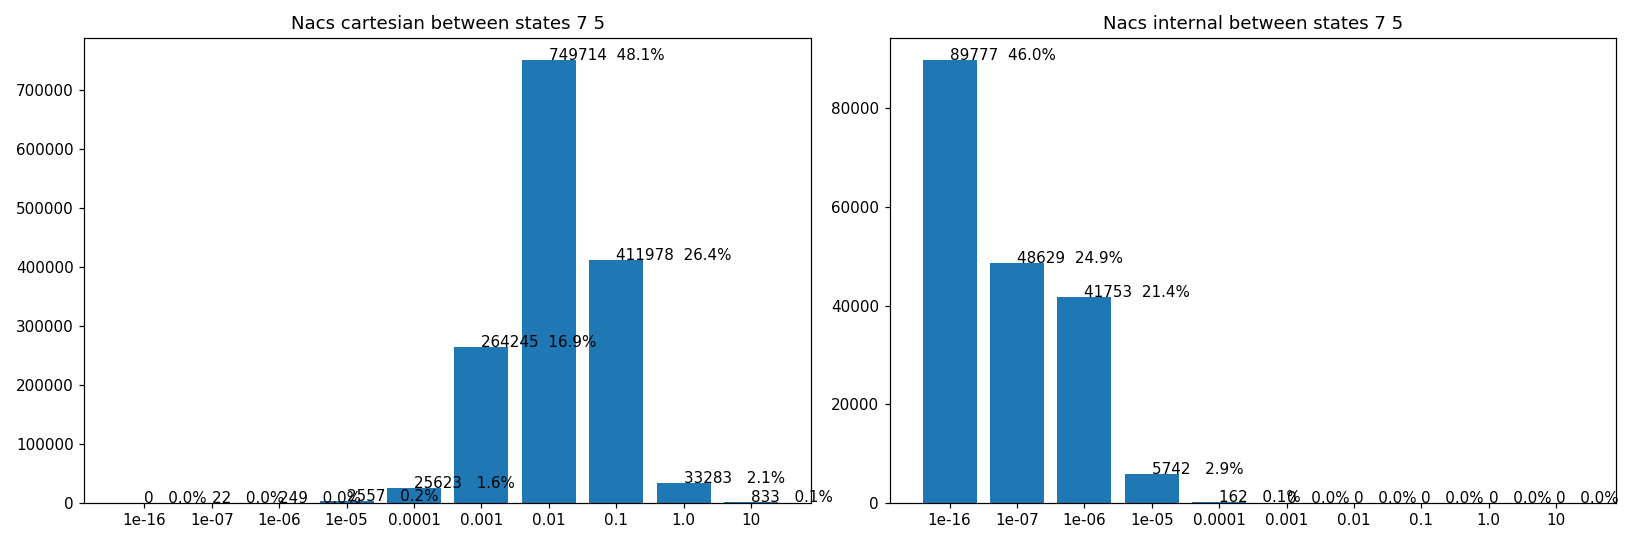

<IPython.core.display.Javascript object>


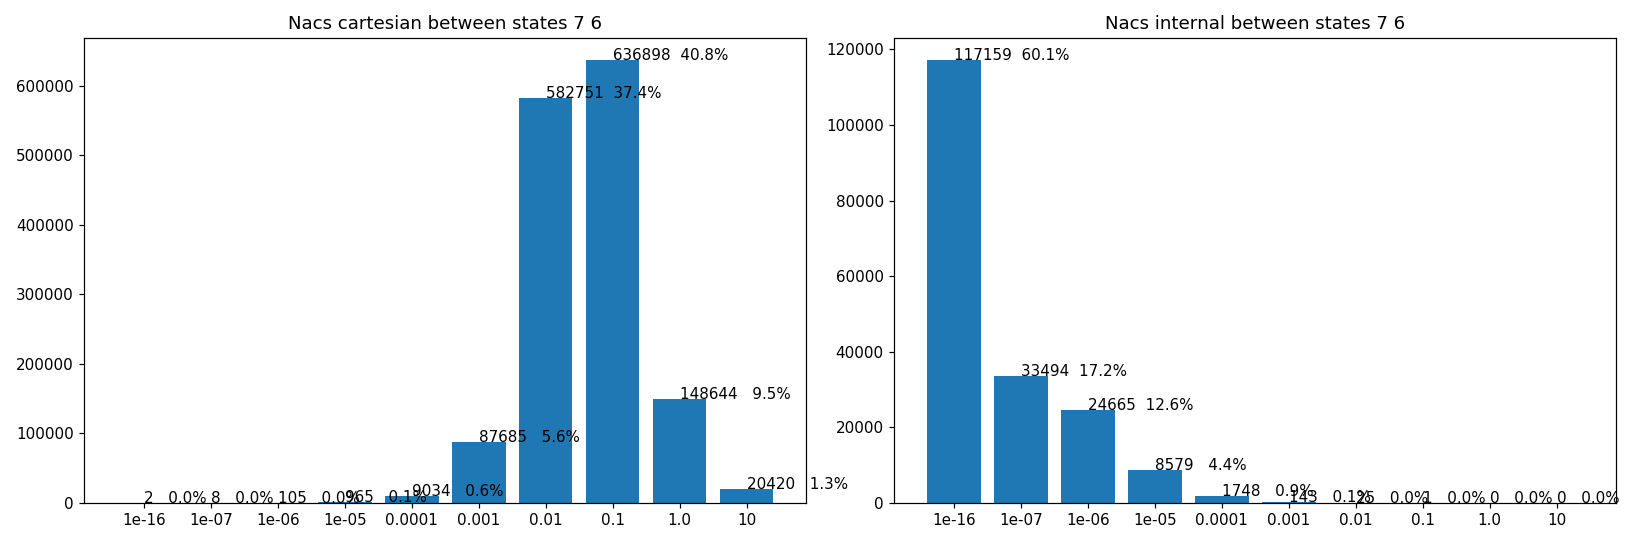

In [3]:
import matplotlib.pyplot as plt
%matplotlib notebook

makeGraph = True

states_to_plot = 8

if makeGraph:
    for s1 in range(states_to_plot):
        for s2 in range(s1):

            a = np.abs(nac_int[:,:,:,s1,s2,:].flatten())
            len_a = a.size
            
            b = np.abs(nac_car[:,:,:,s1,s2,:,:].flatten())
            len_b = b.size
            
            binZ = [0.0000000000000001, 0.0000001, 0.000001, 0.00001,0.0001,0.001,0.01,0.1,1.0,10,1000000000] # last one is not displayed
            # thing here is the integer where I plot the bar (x position)
            thing = np.arange(len(binZ)-1)            
            label_names = [ '{}'.format(x) for x in binZ ]

            
            counts_a, bins_a = np.histogram(a,bins=binZ)
            counts_b, bins_b = np.histogram(b,bins=binZ)

            fig, (ax1,ax0) = plt.subplots(1,2,figsize=(15,5))
            
            ax0.bar(thing,counts_a)
            ax1.bar(thing,counts_b)
     
            for xy in zip(thing, counts_a):
                percentage = (xy[1]/len_a)*100
                ax0.annotate('{} {:5.1f}%'.format(xy[1],percentage), xy=xy)
            for xy in zip(thing, counts_b):
                percentage = (xy[1]/len_b)*100
                ax1.annotate('{} {:5.1f}%'.format(xy[1],percentage), xy=xy)


            ax0.set_xticks(thing, minor=False)
            ax0.set_xticklabels(label_names, fontdict=None, minor=False)
            ax0.set_title('Nacs internal between states {} {}'.format(s1,s2))
            
            ax1.set_xticks(thing, minor=False)
            ax1.set_xticklabels(label_names, fontdict=None, minor=False)
            ax1.set_title('Nacs cartesian between states {} {}'.format(s1,s2))
            
            plt.tight_layout()


# Norm product

In [95]:
## Divide the molcas ones by the mass.
## then create a cube and a histogram for the RATIOS, how much we lose by pojecting cartesian to internal space
## then visualize the cube
## smooth and multiply


import matplotlib.pyplot as plt
%matplotlib notebook



states_to_plot = 2

norms_car = np.linalg.norm(nac_car,axis=(5,6))
norms_int = np.linalg.norm(nac_int,axis=5)

makeGraph = True

if makeGraph:
    for s1 in range(states_to_plot):
        for s2 in range(s1):

            a = np.abs(norms_int[:,:,:,s1,s2].flatten())
            len_a = a.size
            
            b = np.abs(norms_car[:,:,:,s1,s2].flatten())
            len_b = b.size
            
            c = b/a
            len_c = c.size
            print(a,b,c)
            
            binZ = [0.0000000000000001, 0.0000001, 0.000001, 0.00001,0.0001,0.001,0.01,0.1,1.0,10,1000000000] # last one is not displayed
            binZ2 = [1, 10, 100, 1000,1000,10000,100000,1000000,100000000000000] # last one is not displayed
            
#             # thing here is the integer where I plot the bar (x position)
#             thing = np.arange(len(binZ)-1)
#             label_names = [ '{}'.format(x) for x in binZ ]
            
#             thing2 = np.arange(len(binZ2)-1)
#             label_names2 = [ '{}'.format(x) for x in binZ2 ]
            
#             counts_a, bins_a = np.histogram(a,bins=binZ)
#             counts_b, bins_b = np.histogram(b,bins=binZ)
#             counts_c, bins_c = np.histogram(c,bins=binZ2)

#             fig, [ax1,ax0,ax2] = plt.subplots(1,3,figsize=(15,5))
            
#             ax0.bar(thing,counts_a)
#             ax1.bar(thing,counts_b)
#             ax2.bar(thing,counts_c)
     
#             for xy in zip(thing, counts_a):
#                 percentage = (xy[1]/len_a)*100
#                 ax0.annotate('{} {:5.1f}%'.format(xy[1],percentage), xy=xy)
#             for xy in zip(thing, counts_b):
#                 percentage = (xy[1]/len_b)*100
#                 ax1.annotate('{} {:5.1f}%'.format(xy[1],percentage), xy=xy)
# #             for xy in zip(thing, counts_c):
# #                 percentage = (xy[1]/len_c)*100
# #                 ax2.annotate('{} {:5.1f}%'.format(xy[1],percentage), xy=xy)


#             ax0.set_xticks(thing, minor=False)
#             ax0.set_xticklabels(label_names, fontdict=None, minor=False)
#             ax0.set_title('Nacs internal NORMS states {} {}'.format(s1,s2))
            
#             ax1.set_xticks(thing, minor=False)
#             ax1.set_xticklabels(label_names, fontdict=None, minor=False)
#             ax1.set_title('Nacs cartesian NORMS states {} {}'.format(s1,s2))
            
# #             ax2.set_xticks(thing, minor=False)
# #             ax2.set_xticklabels(label_names, fontdict=None, minor=False)
# #             ax2.set_title('Nacs cartesian NORMS states {} {}'.format(s1,s2))
            
#             plt.tight_layout()


[  7.59441157e-07   7.42230163e-07   7.29566703e-07 ...,   4.17534443e-06
   4.57369894e-06   5.03759927e-06] [ 0.21963731  0.23009617  0.24156063 ...,  1.05934504  1.13255914
  1.21740451] [ 289209.1263395   310006.49157777  331101.50032208 ...,  253714.40733035
  247624.32997251  241663.62725565]


/home/alessio/config/miniconda/envs/quantumpropagator/lib/python3.5/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


In [89]:
%%time

def giveme(a):
    vector = np.random.normal(size=(8,3))
    norm_vector = np.linalg.norm(vector)
    normalized = vector/norm_vector
    return(np.dot(a.flatten(),normalized.flatten()))


fn = '/home/alessio/Desktop/a-3dScanSashaSupport/b-BranchingCI/DerCoup'

a=np.loadtxt(fn)

average = np.average(np.abs([ giveme(a[7:]) for i in range(500000) ]))

print(average)

0.164337058016
CPU times: user 5.97 s, sys: 66.2 ms, total: 6.04 s
Wall time: 6.04 s
